import pandas as pd

df = pd.read_csv("cic_ids_smote03.csv")

In [1]:
import pandas as pd

df = pd.read_csv("D:/dataset/cleaned_improved_cicids2017.csv")

In [29]:
df['Label'].value_counts()

0     1594540
11     159066
4      158468
2       95144
10      71767
3        7567
7        3972
6        3859
12       2961
5        1740
1         736
13         73
9          36
15         18
14         13
8          11
Name: Label, dtype: int64

BENIGN                        1594540<br>
Portscan                       159066<br>
DoS Hulk                       158468<br>
DDoS                            95144<br>
Infiltration - Portscan         71767<br>
DoS GoldenEye                    7567<br>
FTP-Patator                      3972<br>
DoS Slowloris                    3859<br>
SSH-Patator                      2961<br>
DoS Slowhttptest                 1740<br>
Botnet                            736<br>
Web Attack - Brute Force           73<br>
Infiltration                       36<br>
Web Attack - XSS                   18<br>
Web Attack - SQL Injection         13<br>
Heartbleed                         11<br>

In [5]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding 적용
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])


# 인코딩된 데이터프레임 확인
print(df['Label'].value_counts())

0     1594540
11     159066
4      158468
2       95144
10      71767
3        7567
7        3972
6        3859
12       2961
5        1740
1         736
13         73
9          36
15         18
14         13
8          11
Name: Label, dtype: int64


누적 분산 비율 (cumulative explained variance):
[0.1637431  0.30741682 0.38044498 0.44484897 0.49760703 0.53684254
 0.57528367 0.61004602 0.63783601 0.66231629 0.68490672 0.70568362
 0.72619939 0.74620412 0.76542962 0.78345794 0.79975675 0.81484703
 0.82899478 0.84168101 0.85386926 0.86603012 0.87737623 0.88864443
 0.89957596]
Label 데이터 타입: int32


C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\matplotlib

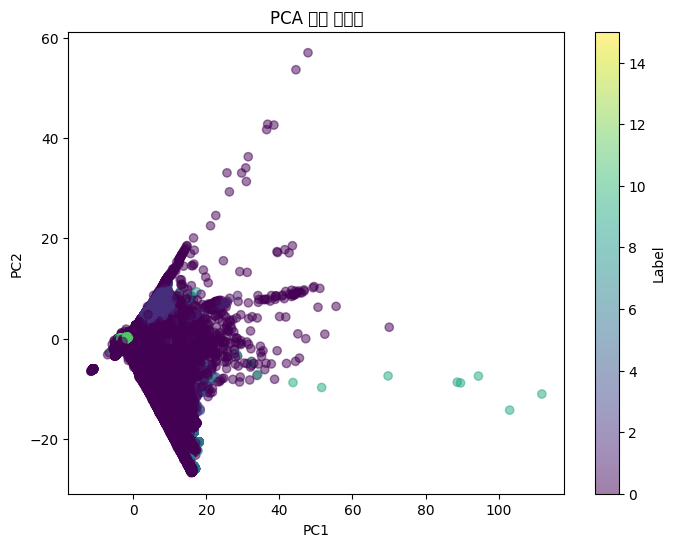

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

tmp = df.drop(labels = 'Label',axis=1)
labels = df['Label']

# 1. 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(tmp)

# 2. PCA 적용 (주성분 개수 설정)
n_components = 25  # 원하는 차원 수로 설정
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)


# 3. PCA 누적 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()
print("누적 분산 비율 (cumulative explained variance):")
print(explained_variance_ratio)

# 4. PCA 결과를 DataFrame으로 변환하고 label 병합
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
df_merged = X_pca_df.assign(label=labels.values)

# 5. 병합된 데이터 타입 확인
print("Label 데이터 타입:", df_merged['label'].dtype)

# 6. 정렬 여부 확인 (필요하면 추가)
# 확인 예시: 병합 전후 `labels` 순서와 `df_merged['label']`이 동일한지 점검
assert np.array_equal(labels.values, df_merged['label'].values), "Label 순서가 일치하지 않습니다."

# 7. PCA 결과 시각화 (2D로 줄인 경우)
import matplotlib.pyplot as plt
if n_components >= 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA 결과 시각화')
    plt.colorbar(label='Label')
    plt.show()

In [7]:
df_merged.shape

(2099971, 26)

In [8]:
df_merged.to_csv("D:/dataset/0219_Paper_Dataset/df_pca.csv", index=False)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_merged, test_size=0.1, random_state=42)
X_train.shape, X_test.shape

((1889973, 26), (209998, 26))

In [10]:
X_train_normal = X_train[X_train['label'] == 0]
X_train_normal.shape

X_test_normal = X_test[X_test['label'] == 0]
X_test_normal.shape

(159227, 26)

In [11]:
X_train_not_normal = X_train[X_train['label'] !=0]

X_test = pd.concat([X_test, X_train_not_normal])

In [12]:
y_test = X_test['label']
X_test = X_test.drop(labels='label',axis=1)
y_train_normal = X_train_normal['label']
X_train_normal = X_train_normal.drop(labels='label', axis=1)

In [13]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector, Conv1D, Conv1DTranspose
from keras.models import Model
from keras import regularizers
from keras_self_attention import SeqWeightedAttention, SeqSelfAttention
from keras.callbacks import EarlyStopping

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Model, Input
import numpy as np
from tensorflow.keras import backend as K

latent_dim = 10
inter_dim = 20

# Sampling function for reparameterization trick
def sampling(args):
    z_mean, z_log_sigma = args
    batch_size = tf.shape(z_mean)[0]
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
    return z_mean + z_log_sigma * epsilon

def vae_loss(x, x_decoded_mean, z_mean, z_log_sigma):
    reconstruction_loss = K.sum(K.square(x - x_decoded_mean), axis=1)
    kl_loss = -0.5 * K.sum(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    kl_loss_weighted = kl_loss * 0.0001  # KL 다이버전스 손실에 가중치 부여
    total_loss = K.mean(reconstruction_loss + kl_loss_weighted)
    return total_loss

def cvae(X, labels):
    features = X.shape[1]  # 2D 데이터이므로 timesteps는 필요 없고, features만 사용
    input_x = Input(shape=(features,), name='InputFeatures')  # 2D 입력 (샘플, 특징)

    input_label = Input(shape=(1,), name='InputLabel')  # Assumes binary or multi-class label

    # Embed the label into the same shape as the input
    embedded_label = layers.Embedding(input_dim=2, output_dim=features)(input_label)  # Adjust output_dim to match features
    embedded_label = layers.Flatten()(embedded_label)

    # Concatenate input_x and embedded_label
    concatenated_input = layers.Concatenate()([input_x, embedded_label])

    # Reshape for Conv1D layer (to 3D)
    reshaped_input = layers.Reshape((features + embedded_label.shape[-1], 1))(concatenated_input)

    # Encoder with CNN layers
    h = layers.Conv1D(filters=64, kernel_size=3, activation="relu", padding='same')(reshaped_input)
    h = layers.Conv1D(filters=32, kernel_size=3, activation="relu", padding='same')(h)
    h = layers.Conv1D(filters=16, kernel_size=3, activation="relu", padding='same')(h)

    # Flatten for dense layers (MLP)
    h = layers.Flatten()(h)
    h = layers.Dense(inter_dim, activation='relu')(h)
    h = layers.Dense(inter_dim, activation='relu')(h)

    # z layer
    z_mean = layers.Dense(latent_dim)(h)
    z_log_sigma = layers.Dense(latent_dim)(h)
    z = layers.Lambda(sampling)([z_mean, z_log_sigma])

    # Decoder
    # Add the label to the latent space z
    z_with_label = layers.Concatenate()([z, embedded_label])

    # Expand for Conv1DTranspose layer
    decoder1 = layers.Dense((features + embedded_label.shape[-1]) * inter_dim)(z_with_label)
    decoder1 = layers.Reshape((features + embedded_label.shape[-1], inter_dim))(decoder1)

    # Decoder with CNN layers
    decoder1 = layers.Conv1DTranspose(filters=16, kernel_size=3, activation="relu", padding='same')(decoder1)
    decoder1 = layers.Conv1DTranspose(filters=32, kernel_size=3, activation="relu", padding='same')(decoder1)
    decoder1 = layers.Conv1DTranspose(filters=64, kernel_size=3, activation="relu", padding='same')(decoder1)

    # Flatten and final dense layer to reconstruct original features
    decoder1 = layers.Flatten()(decoder1)
    decoder1 = layers.Dense(features)(decoder1)
    
    model = Model([input_x, input_label], decoder1)
    model.add_loss(vae_loss(input_x, decoder1, z_mean, z_log_sigma))
    
    return model

# Create CVAE model
model = cvae(X_train_normal, y_train_normal)
model.summary()

from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])
# Create an EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile and train the model with early stopping
history = model.fit([X_train_normal, y_train_normal], X_train_normal,
                    shuffle=True,
                    epochs=50, 
                    validation_split=0.1,  
                    batch_size=32,
                    callbacks=[early_stopping]).history


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 InputLabel (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 25)        50          ['InputLabel[0][0]']             
                                                                                                  
 InputFeatures (InputLayer)     [(None, 25)]         0           []                               
                                                                                                  
 flatten_3 (Flatten)            (None, 25)           0           ['embedding_1[0][0]']            
                                                                                            

 )                                                                                                
                                                                                                  
 tf.__operators__.add_3 (TFOpLa  (None,)             0           ['tf.math.reduce_sum_2[0][0]',   
 mbda)                                                            'tf.math.multiply_3[0][0]']     
                                                                                                  
 tf.math.reduce_mean_1 (TFOpLam  ()                  0           ['tf.__operators__.add_3[0][0]'] 
 bda)                                                                                             
                                                                                                  
 add_loss_1 (AddLoss)           ()                   0           ['tf.math.reduce_mean_1[0][0]']  
                                                                                                  
Total para

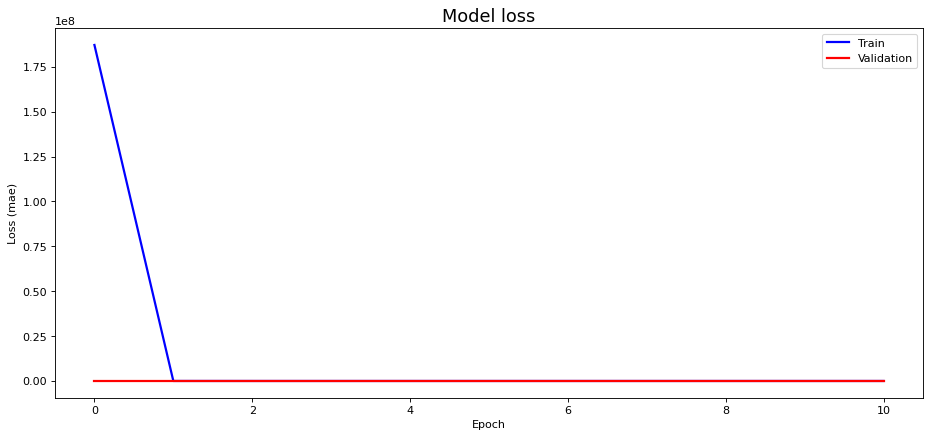

In [16]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [17]:
def flatten(X):
    flattened_X = np.empty((X.shape[0], X.shape[2]))  # sample x features array.
    for i in range(X.shape[0]):
        flattened_X[i] = X[i, (X.shape[1]-1), :]
    return(flattened_X)

In [18]:
valid_x_predictions = model.predict([X_test, y_test])
#mse = np.mean(np.power(flatten(test_X_selected) - flatten(valid_x_predictions), 2), axis=1)

mse = np.mean(np.power(X_test - valid_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test.tolist()})

20771/20771 [==============================] - 46s 2ms/step


In [19]:
error_df

,reconstruction_error,true_class
464355,0.001636,0
660360,1.249380,7
1411149,0.027517,0
2022900,0.000622,0
672693,0.194598,0
...,...,...
1825573,4.775153,2
1370455,1.161013,10
787201,2.265621,4
2003274,0.783836,11


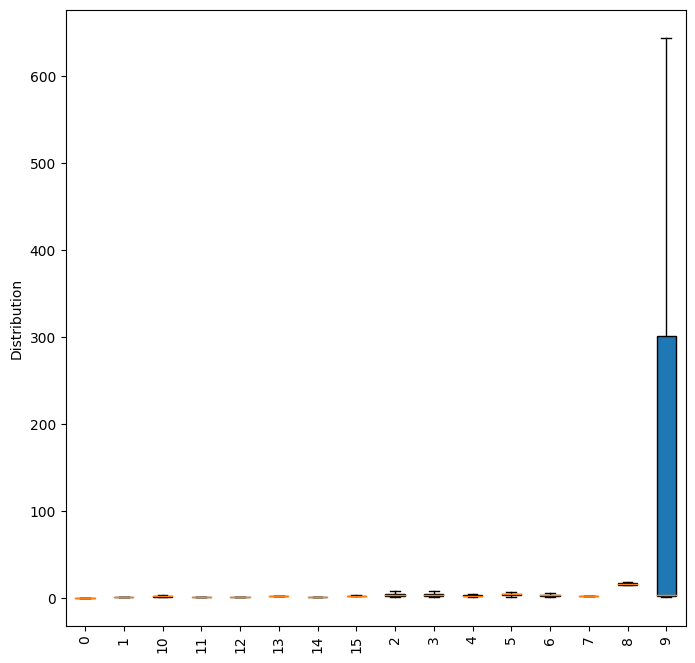

In [26]:
import matplotlib.pyplot as plt

# 데이터프레임 준비
true_class = error_df['true_class'].astype(str)
reconstruction_error = error_df['reconstruction_error']

# 박스 플롯 그리기
plt.figure(figsize=(8, 8))
plt.boxplot(
    [reconstruction_error[true_class == cls] for cls in sorted(true_class.unique())],
    labels=sorted(true_class.unique()),
    showfliers=False,
    vert=True,
    patch_artist=True
)

plt.ylabel('Distribution')
plt.xticks(rotation=90)
plt.show()


In [28]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# error_df는 이미 아래와 같이 생성되었다고 가정합니다.
# mse = np.mean(np.power(X_test - valid_x_predictions, 2), axis=1)
# error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_test.tolist()})

# 정상 데이터의 라벨 (예시: 0이 정상 데이터)
normal_label = 0

# 전체 클래스에서 정상 라벨을 제외한 공격 라벨을 추출합니다.
all_labels = error_df['true_class'].unique()
attack_labels = [label for label in all_labels if label != normal_label]

results = {}

for attack in attack_labels:
    # 정상과 해당 공격 데이터만 선택합니다.
    binary_df = error_df[error_df['true_class'].isin([normal_label, attack])].copy()
    
    # 이진 레이블 생성: 정상은 0, 공격은 1로 지정합니다.
    binary_df['binary_label'] = binary_df['true_class'].apply(lambda x: 0 if x == normal_label else 1)
    
    # 정상 데이터의 reconstruction error의 95번째 백분위수를 임계치로 계산합니다.
    threshold = binary_df[binary_df['binary_label'] == 0]['reconstruction_error'].quantile(0.95)
    
    # 임계치보다 reconstruction error가 높으면 공격(1), 낮으면 정상(0)으로 예측합니다.
    binary_df['predicted'] = binary_df['reconstruction_error'].apply(lambda x: 1 if x > threshold else 0)
    
    # Confusion Matrix와 Classification Report 계산
    conf_mat = confusion_matrix(binary_df['binary_label'], binary_df['predicted'])
    class_report = classification_report(binary_df['binary_label'], binary_df['predicted'])
    
    # ROC AUC 점수는 reconstruction error를 continuous score로 사용하여 계산합니다.
    auc_score = roc_auc_score(binary_df['binary_label'], binary_df['reconstruction_error'])
    
    results[attack] = {
        'threshold': threshold,
        'confusion_matrix': conf_mat,
        'classification_report': class_report,
        'auc': auc_score
    }
    
    print(f"=== 공격 번호: {attack} ===")
    print("Threshold:", threshold)
    print("Confusion Matrix:")
    print(conf_mat)
    print("Classification Report:")
    print(class_report)
    print("AUC:", auc_score)
    print("\n")


=== 공격 번호: 7 ===
Threshold: 0.07311040093465941
Confusion Matrix:
[[151265   7962]
 [     0   3972]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    159227
           1       0.33      1.00      0.50      3972

    accuracy                           0.95    163199
   macro avg       0.67      0.97      0.74    163199
weighted avg       0.98      0.95      0.96    163199

AUC: 0.9976272751289587


=== 공격 번호: 2 ===
Threshold: 0.07311040093465941
Confusion Matrix:
[[151265   7962]
 [     0  95144]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    159227
           1       0.92      1.00      0.96     95144

    accuracy                           0.97    254371
   macro avg       0.96      0.97      0.97    254371
weighted avg       0.97      0.97      0.97    254371

AUC: 0.9990302419141811


=== 공격 번호: 10 ===
Threshold: 0.073110400934659